In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import os
os.chdir(r"C:\Users\Rahul\Desktop\spark intern\task4")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# center and scale the data
from sklearn.preprocessing import StandardScaler

# data Inspection

In [2]:
data = pd.read_csv(r"C:\Users\Rahul\Desktop\spark intern\task 3\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# No missing values in the dataset

In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# visualising the data

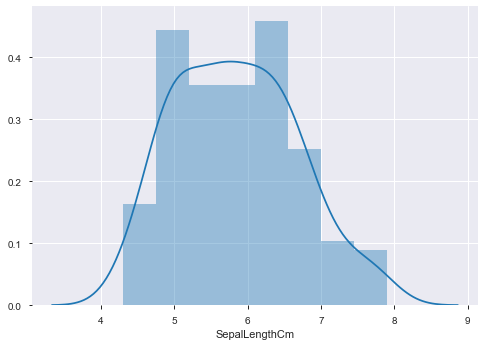

In [6]:
sns.distplot(data.SepalLengthCm)
plt.show()

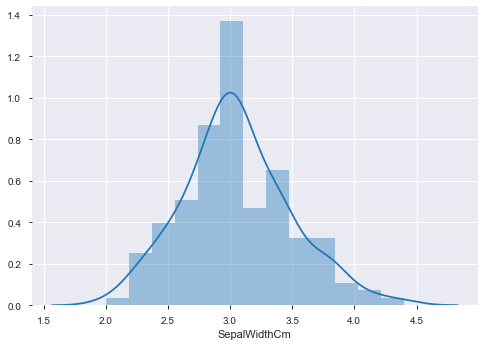

In [7]:
sns.distplot(data.SepalWidthCm)
plt.show()

# Drop columns which are not adding usefull information 

In [8]:
data.drop(["Id"],axis = 1,inplace = True)

# converting attacks into continous columns

In [9]:
x = data["Species"].unique()
z =  x.tolist()
y = np.arange(0,3)
data["Species_Type"] = data.Species.replace(z, y)
data.drop(["Species"],axis = 1,inplace = True)

# visualize correlation matrix in Seaborn using a heatmap


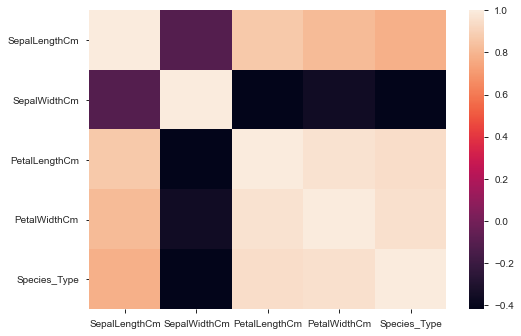

In [10]:
sns.heatmap(data.corr())
plt.show()

# Creating dependent and independent variable

In [11]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_Type'],
      dtype='object')

# Creating X and Y variables

In [12]:
X = data.loc[:,['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = data.loc[:,['Species_Type']]

# Instantiate a DecisionTreeClassifier 

In [22]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [19]:
# Visualize the graph

import pydotplus as pdot

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)


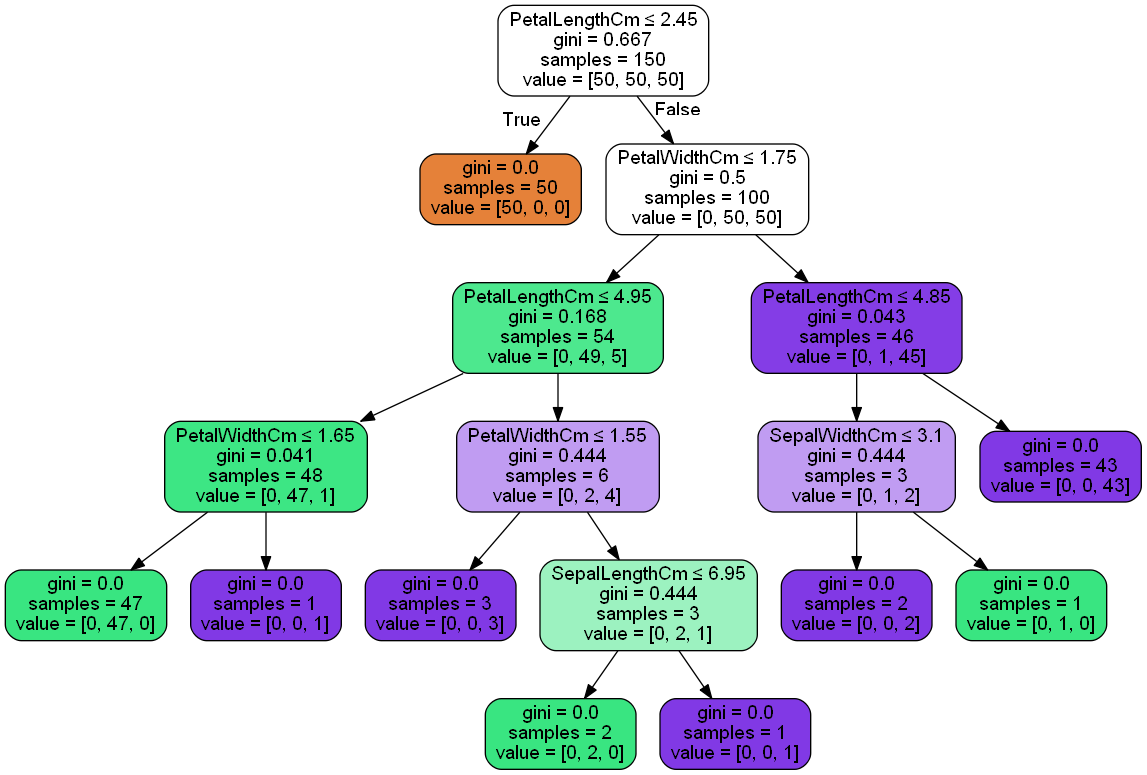

In [20]:
# Visualize the graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('species.png')
Image(graph.create_png())